In [5]:
!pip install discord-webhook scikit-learn pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 760.3 kB/s eta 0:00:000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 469.6 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 1.6 MB/s eta 0:00:0000:0100:01


In [6]:
# Importando las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
import datetime


In [7]:
# Cargar los datos
data_path = 'air_quality_data.csv'
data = pd.read_csv(data_path)

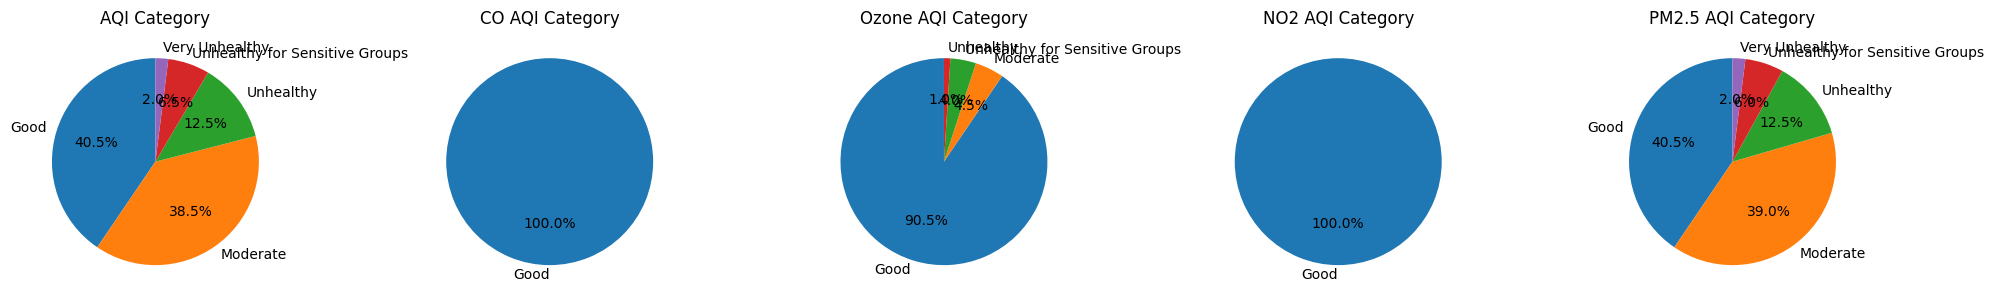

In [8]:

# Lista de columnas de categoría para generar pie charts
category_columns = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category',
                    'NO2 AQI Category', 'PM2.5 AQI Category']

# Crear pie charts para cada columna de categoría
fig, axes = plt.subplots(1, len(category_columns), figsize=(20, 4))

for i, col in enumerate(category_columns):
    data[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Mean Squared Error: 225.84656951083835
R2 Score: 0.9045331775371735


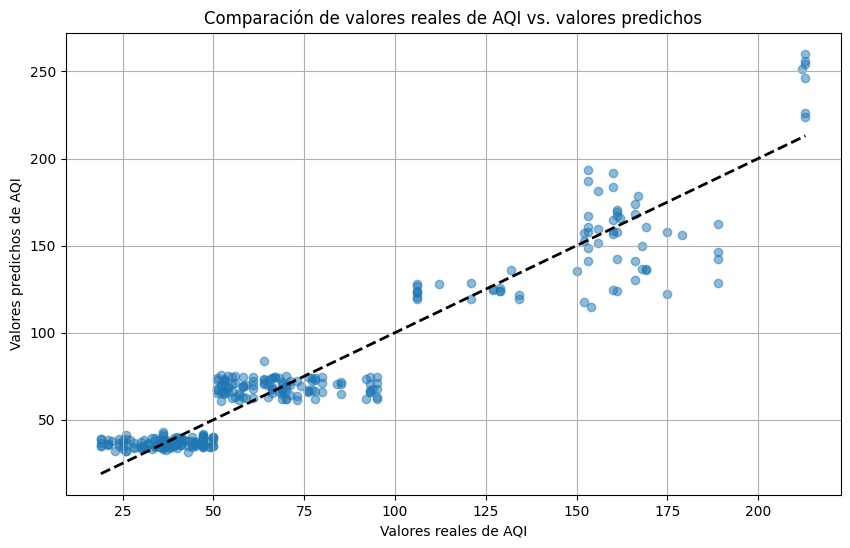

In [9]:
# Convertir 'Date Time' a datetime
data['Date Time'] = pd.to_datetime(data['Date Time'])

# Codificación de variables categóricas y algunas numéricas
encoder = OrdinalEncoder()
categorical_columns = ['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category',
                       'NO2 AQI Category', 'PM2.5 AQI Category']

# Codificar las columnas
data_encoded = data.copy()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

# Dividir los datos
features = ['Country', 'City', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value',
            'AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
target = 'AQI Value'
X_train, X_test, y_train, y_test = train_test_split(data_encoded[features], data_encoded[target], test_size=0.2, random_state=0)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar métricas
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

# Crear un gráfico de dispersión de los valores reales frente a los predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Comparación de valores reales de AQI vs. valores predichos')
plt.xlabel('Valores reales de AQI')
plt.ylabel('Valores predichos de AQI')
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


In [10]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,Date Time
0,France,Ajaccio,44,Good,1,Good,60,Good,89,Good,7,Good,2024-04-25 15:00:00
1,India,Mangaldai,64,Moderate,13,Good,59,Good,69,Good,29,Moderate,2024-09-16 03:00:00
2,Brazil,Carazinho,19,Good,11,Good,72,Good,87,Good,12,Good,2024-01-10 14:00:00
3,Thailand,Chumphon,41,Good,4,Good,33,Good,44,Good,4,Good,2024-06-24 18:00:00
4,Pakistan,Sarai Naurang,175,Unhealthy,6,Good,116,Moderate,74,Good,124,Unhealthy,2024-04-15 08:00:00


In [11]:
from discord_webhook import DiscordWebhook

# Función para hacer predicciones con nuevos datos
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    input_df['Date Time'] = pd.to_datetime(input_df['Date Time'])
    input_df_encoded = encoder.transform(input_df[categorical_columns])
    input_df[categorical_columns] = input_df_encoded
    prediction = model.predict(input_df[features])
    return prediction[0]

# Ejemplo de uso
new_data = {
    'Country': 'India',
    'City': 'Mangaldai',
    'CO AQI Value': 15,
    'Ozone AQI Value': 70,
    'NO2 AQI Value': 45,
    'PM2.5 AQI Value': 20,
    'AQI Category': 'Unhealthy',
    'CO AQI Category': 'Good',
    'Ozone AQI Category': 'Moderate',
    'NO2 AQI Category': 'Good',
    'PM2.5 AQI Category': 'Good',
    'Date Time': '2025-09-23 19:00:00'
}
predicted_value = make_prediction(new_data)
print('Predicted AQI Value:', predicted_value)

# Determinar la calidad del aire basada en el valor AQI
if predicted_value <= 50:
    calidad_aire = "buena"
elif predicted_value <= 100:
    calidad_aire = "moderada"
else:
    calidad_aire = "mala"

# Configuración del webhook y mensaje
webhook_url = 'https://discord.com/api/webhooks/1243106155174035486/lWB3cHX69Q1DyuMPQZ7uXLlYqvPPmTwmFpN-IByz1IaSgjG_9dtXP-atei_RO00nhG1W'
mensaje = f"Predicción de Calidad del Aire para {new_data['City']}, {new_data['Country']} el {new_data['Date Time']}: El valor AQI predicho es aproximadamente {predicted_value}, lo cual indica una calidad de aire {calidad_aire}."
webhook = DiscordWebhook(url=webhook_url, content=mensaje)
response = webhook.execute()

Predicted AQI Value: 87.81783787554767
